# Mean-Variance Portfolio Optimization

## Introduction

The fundamental goal of portfolio theory is to allocate your investments between multiple assets optimally. A Markowitz mean-variance optimization (MVO) is an approach to choosing how to allocate money between multiple assets by considering the risk-return trade-off of asset combinations.

The approach considers the expected returns and covariance for all assets. It returns a set of portfolios where:
 - The expected return is greater than any other with the same or lesser risk
 - The risk is less than any other with the same expected return

## Inputs: Expected Return I

Typically, when we download stock data, the information is formatted as asset values at the end of a period (daily, monthly, quarterly). When we calculate the efficient frontiers, we need to structure the data as the percent returned over each period.

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [125]:
path='stock_data.csv'
stock_data = pd.read_csv(path)

In [126]:
# Calculate the quarterly returns
selected_columns = list(stock_data.columns[1:])
quarterly_returns = stock_data[selected_columns].pct_change()
expected_returns_avg = quarterly_returns.mean()

try:
  print(expected_returns_avg)
except:
  print('Calculate the average quarterly expected returns and save it to expected_returns_avg.')

Delta        0.062093
Jet Blue     0.052361
Chevron      0.010323
Exxon       -0.002444
Adobe        0.053780
Honeywell    0.028439
dtype: float64


## Inputs: Expected Return II

Estimating the expected return of an asset is at the core of all financial investments. People often invest based on their interest in a company’s product – maybe they make your favorite sneakers or use artificial intelligence to optimize a green energy grid. Investing based on feeling isn’t smart.

To estimate the return and volatility of a portfolio with multiple assets, we need first to calculate the amount that we invest in each asset.

### Weight of an Asset

The weight of an asset is the fraction of the money invested in the asset (the numerator of the fraction below), divided by the total amount of money in the portfolio (the denominator of the fraction below):

$$ 
w_n = {{c_n} \over {total}}
$$

In [127]:
total = 10000

weight_nike = 3000/total
weight_ua = 2000/total
weight_skechers = 5000/total

try:
  print(f'The weight invested in Nike is {weight_nike}')
except:
  print('You did not create the weight_nike variable yet')
try:
  print(f'The weight invested in Under Armour is {weight_ua}')
except:
  print('You did not create the weight_ua variable yet')
try:
  print(f'The weight invested in Skechers is {weight_skechers}')
except:
  print('You did not create the weight_skechers variable yet')

The weight invested in Nike is 0.3
The weight invested in Under Armour is 0.2
The weight invested in Skechers is 0.5


## Inputs: Expected Return III

In the last exercise, you calculated the expected return of individual assets. But we’re interested in the return of a portfolio with multiple assets. To calculate the expected return of a portfolio, you must find the weighted sum of the return for each individual asset:

$$ 
ER = w_1 R_1 + w_2 R_2 + w_3 R_3 + w_4 R_4
$$

In [128]:
weight_nike = 0.8
weight_ua = 0.16
weight_skechers = 0.04
expected_returns_nike = 0.014
expected_returns_ua = 0.008
expected_returns_sketchers = 0.07

expected_return = weight_nike*expected_returns_nike + weight_ua*expected_returns_ua + weight_skechers*expected_returns_sketchers

try:
  print('The expected return is equal to {:.2f}%'.format(expected_return))
except:
  print('You did not create the expected_return variable yet')

The expected return is equal to 0.02%


## Inputs: Covariance Matrix I

It would be nice if every asset made large, consistent positive returns every period. If that were the case, we could invest all of our money in the asset with the highest expected return. But, the return of any given asset is unpredictable.

### Variance Measures an Asset’s Risk

The measure of an asset’s unpredictability is called its risk. We can estimate the risk of an asset by calculating its variance. If an asset’s return is very unpredictable, then its variance will be large and the investment considered risky. If an asset’s variance is small, the asset’s returns are predictable and the asset is not as risky.

When we quantify the risk of a portfolio, in addition to the variance of each asset, we must calculate the covariance between each asset and every other asset. If two assets have a positive covariance, then they respond similarly to market forces. Assets with a negative covariance will not. For example:

 - Oil prices affect car sales, which will impact automobile company returns (Ford, Honda, Toyota, General Motors)
 - Increasing farm subsidies make crop production cheaper, which will increase agriculture returns. Agriculture companies, like Tyson, Monsanto, and Cargill will likely all increase in value (positive covariance).
 - Tariffs on electronics may affect cell phone sales, which will decrease returns for hardware manufacturing companies, like Huawei, Apple, and Google (positive covariance).

---

Assets can have a positive covariance, negative covariance, or no covariance:

 - Positive covariance — when one asset increases in value, the other usually increases in value. The covariance value will be greater than 0.
 - Negative covariance — when one asset increases in value, the other usually decreases in value. The covariance value will be less than 0.
 - Uncorrelated assets — when there is no quantifiable pattern to the response of two assets. The covariance value is equal to 0.

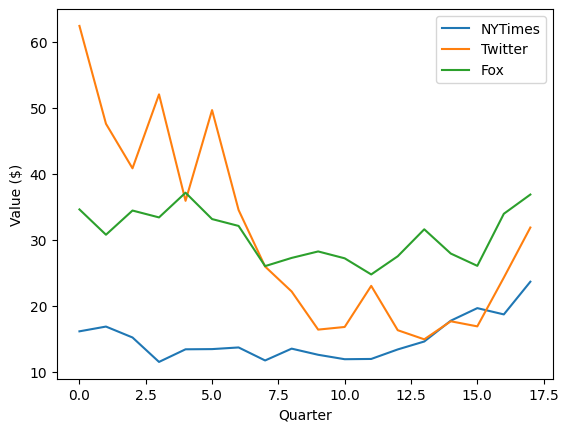

In [129]:
path='stock_data_nyt_fox_twitter.csv'

stock_data = pd.read_csv(path)
stock_data.plot()
plt.xlabel('Quarter')
plt.ylabel('Value ($)')
plt.show()

## Inputs: Covariance Matrix II

To make computations more manageable, we store variances and covariances of assets in a covariance matrix. A covariance matrix is symmetric, with the variance of each asset on the diagonal. 

In [130]:
path='stock_data.csv'

stock_data = pd.read_csv(path)
selected=list(stock_data.columns[1:])

returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()

returns_cov = returns_quarterly.cov()

print(returns_cov.round(4))


            Delta  Jet Blue  Chevron   Exxon   Adobe  Honeywell
Delta      0.0578    0.0379  -0.0004  0.0021  0.0042     0.0081
Jet Blue   0.0379    0.0450  -0.0018  0.0024 -0.0015     0.0055
Chevron   -0.0004   -0.0018   0.0110  0.0070  0.0046     0.0070
Exxon      0.0021    0.0024   0.0070  0.0072  0.0031     0.0062
Adobe      0.0042   -0.0015   0.0046  0.0031  0.0225     0.0113
Honeywell  0.0081    0.0055   0.0070  0.0062  0.0113     0.0132


<Axes: >

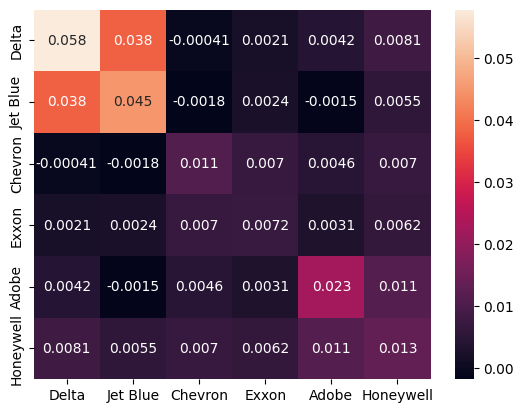

In [131]:
# display the returns_cov matrix in a heatmap
import seaborn as sns
sns.heatmap(returns_cov, annot=True)

## Efficient Frontier I

Now we’re ready to visualize the mean-variance tradeoff for a collection of random portfolios. In this exercise, we provide you with a function, called `return_portfolios()` that accepts the expected returns and covariance matrix for a collection of assets. The function returns a DataFrame with 5,000 portfolios of random asset weights. We will not step through how we implemented the function in this exercise.

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from rf import return_portfolios
import numpy as np

stock_prices = pd.read_csv('stock_data.csv')
selected=list(stock_prices.columns[1:])
returns_quarterly = stock_prices[selected].pct_change()
expected_returns = returns_quarterly.mean()
cov_quarterly = returns_quarterly.cov()

random_portfolios = return_portfolios(expected_returns, cov_quarterly)
print(random_portfolios.head().round(4))
print(random_portfolios.tail().round(4))

   Returns  Volatility  Delta Weight  Jet Blue Weight  Chevron Weight  \
0   0.0437      0.1477        0.2484           0.4290          0.0001   
1   0.0290      0.0893        0.0724           0.1344          0.1543   
2   0.0347      0.1054        0.0742           0.3186          0.0099   
3   0.0198      0.0835        0.0451           0.0636          0.2572   
4   0.0463      0.1432        0.2978           0.3040          0.0289   

   Exxon Weight  Adobe Weight  Honeywell Weight  
0        0.1801        0.0874            0.0550  
1        0.2095        0.1630            0.2664  
2        0.2432        0.1514            0.2027  
3        0.3110        0.1007            0.2224  
4        0.0133        0.0577            0.2984  
      Returns  Volatility  Delta Weight  Jet Blue Weight  Chevron Weight  \
4995   0.0444      0.1431        0.3784           0.2506          0.1752   
4996   0.0302      0.1028        0.1366           0.2440          0.1292   
4997   0.0332      0.1003        

In [133]:
random_portfolios.sort_values('Returns', ascending=False, inplace=True)
random_portfolios.reset_index(drop=True).head().round(4).style

,Returns,Volatility,Delta Weight,Jet Blue Weight,Chevron Weight,Exxon Weight,Adobe Weight,Honeywell Weight
0,0.054300,0.153200,0.346900,0.339100,0.023100,0.009500,0.269500,0.011800
1,0.053800,0.149900,0.308100,0.357300,0.004300,0.011400,0.270400,0.048400
2,0.053400,0.164400,0.391100,0.360100,0.018700,0.026400,0.169700,0.034200
3,0.053300,0.161200,0.565100,0.084900,0.045600,0.006500,0.189600,0.108200
4,0.052600,0.149700,0.236900,0.449300,0.009100,0.035300,0.263000,0.006300


## Efficient Frontier II

When we have a set of portfolios, we typically plot them on a two-dimensional scatter plot, with standard deviation on the x-axis and expected return on the y-axis.

In the last exercise, we showed you that `return_portfolios()` returns a DataFrame with the expected return and volatility for each portfolio.

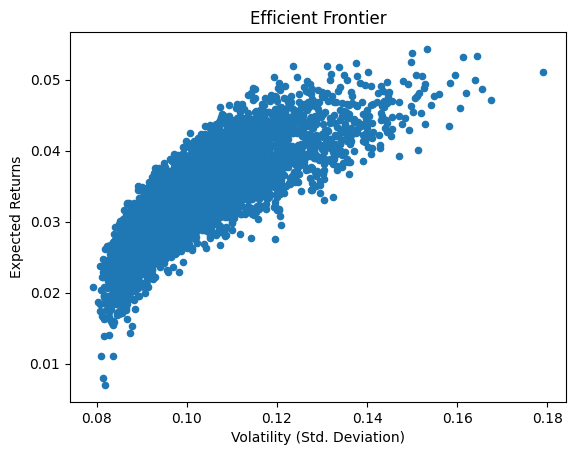

In [134]:
random_portfolios.plot.scatter(x='Volatility', y='Returns')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

## Efficient Frontier III

At this point, we know how to visualize the range of possible portfolios. We still have not found the set of portfolios that optimize for both the expected return and risk of our assets. In this exercise, you will use a function called `optimal_portfolio()` to find mean-variance optimized portfolios.

The `optimal_portfolio()` function has one parameter:

 - `returns` — the returns for all assets over a specified timeframe

The `optimal_portfolio()` function returns:

 - `weights` — the weights for each asset in the portfolio
 - `returns` — the expected returns of each portfolio
 - `risks` — the risk of each portfolio, measured as standard deviation

     pcost       dcost       gap    pres   dres
 0: -3.6910e-02 -1.0606e+00  1e+00  2e-16  3e+00
 1: -3.7860e-02 -7.0546e-02  3e-02  1e-16  9e-02
 2: -5.6522e-02 -6.1228e-02  5e-03  2e-16  2e-17
 3: -5.8910e-02 -5.9232e-02  3e-04  1e-16  2e-17
 4: -5.9195e-02 -5.9202e-02  7e-06  2e-16  2e-17
 5: -5.9202e-02 -5.9202e-02  7e-08  3e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6835e-02 -1.0604e+00  1e+00  0e+00  3e+00
 1: -3.7780e-02 -7.0358e-02  3e-02  7e-17  9e-02
 2: -5.6232e-02 -6.0905e-02  5e-03  2e-16  4e-17
 3: -5.8543e-02 -5.8888e-02  3e-04  1e-16  3e-17
 4: -5.8838e-02 -5.8849e-02  1e-05  3e-16  2e-17
 5: -5.8849e-02 -5.8849e-02  1e-07  2e-16  1e-17
 6: -5.8849e-02 -5.8849e-02  1e-09  3e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6751e-02 -1.0602e+00  1e+00  2e-16  3e+00
 1: -3.7691e-02 -7.0148e-02  3e-02  1e-16  9e-02
 2: -5.5918e-02 -6.0547e-02  5e-03  1e-16  1e-17
 3: -5.8147e-02 -5.8507e

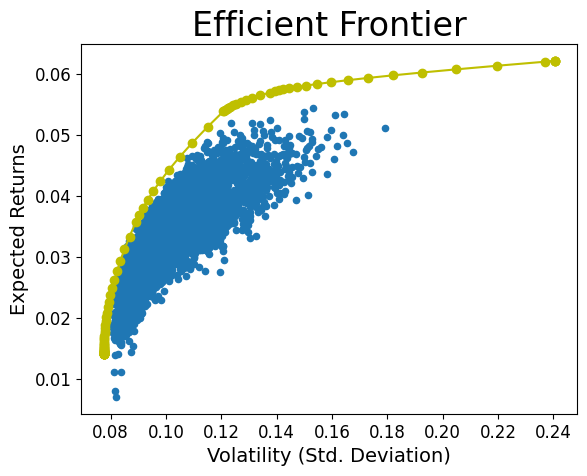

In [135]:
from op import optimal_portfolio

weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)

try:
	plt.plot(risks, returns, 'y-o')
except:
  pass

plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()

## Diverse Portfolios Decrease Variance I

In the last exercise, you found the efficient frontier of a portfolio with Delta, Jet Blue, Chevron, Exxon, Adobe, and Honeywell stocks.

The red X marks in the figure display the volatility and expected return for each individual asset.

The vertical red lines in the figure display the standard deviation of each asset. Notice, there are a few portfolios (blue dots) with volatility lower than the least volatile asset. This feature results from having multiple, uncorrelated assets in the same portfolio.

An important feature that results from this is that increasing the number of uncorrelated assets will decrease or not affect the risk of the portfolio.

     pcost       dcost       gap    pres   dres
 0: -3.6910e-02 -1.0606e+00  1e+00  2e-16  3e+00
 1: -3.7860e-02 -7.0546e-02  3e-02  1e-16  9e-02
 2: -5.6522e-02 -6.1228e-02  5e-03  2e-16  2e-17
 3: -5.8910e-02 -5.9232e-02  3e-04  1e-16  2e-17
 4: -5.9195e-02 -5.9202e-02  7e-06  2e-16  2e-17
 5: -5.9202e-02 -5.9202e-02  7e-08  3e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6835e-02 -1.0604e+00  1e+00  0e+00  3e+00
 1: -3.7780e-02 -7.0358e-02  3e-02  7e-17  9e-02
 2: -5.6232e-02 -6.0905e-02  5e-03  2e-16  4e-17
 3: -5.8543e-02 -5.8888e-02  3e-04  1e-16  3e-17
 4: -5.8838e-02 -5.8849e-02  1e-05  3e-16  2e-17
 5: -5.8849e-02 -5.8849e-02  1e-07  2e-16  1e-17
 6: -5.8849e-02 -5.8849e-02  1e-09  3e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6751e-02 -1.0602e+00  1e+00  2e-16  3e+00
 1: -3.7691e-02 -7.0148e-02  3e-02  1e-16  9e-02
 2: -5.5918e-02 -6.0547e-02  5e-03  1e-16  1e-17
 3: -5.8147e-02 -5.8507e

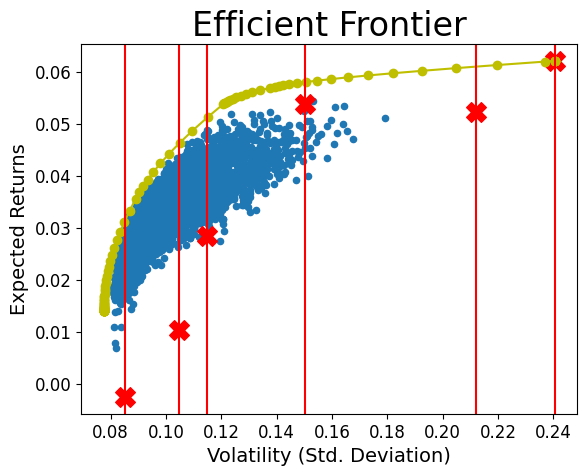

In [136]:
path='stock_data.csv'

stock_data = pd.read_csv(path)
selected=list(stock_data.columns[1:])

returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()
cov_quarterly = returns_quarterly.cov()

single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
df = return_portfolios(expected_returns, cov_quarterly) 
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

df.plot.scatter(x='Volatility', y='Returns', fontsize=12)
plt.plot(risks, returns, 'y-o')
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
for xc in single_asset_std:
    plt.axvline(x=xc, color='red')

plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()

     pcost       dcost       gap    pres   dres
 0: -4.4204e-02 -1.0743e+00  1e+00  1e-16  3e+00
 1: -4.5321e-02 -8.4257e-02  4e-02  9e-17  1e-01
 2: -6.9792e-02 -7.9290e-02  9e-03  2e-16  2e-03
 3: -7.2269e-02 -7.2819e-02  6e-04  1e-16  8e-05
 4: -7.2744e-02 -7.2750e-02  6e-06  1e-16  7e-07
 5: -7.2749e-02 -7.2749e-02  6e-08  2e-16  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4123e-02 -1.0742e+00  1e+00  0e+00  3e+00
 1: -4.5235e-02 -8.4128e-02  4e-02  9e-17  1e-01
 2: -6.9492e-02 -7.9001e-02  1e-02  2e-16  1e-03
 3: -7.1935e-02 -7.2508e-02  6e-04  2e-16  7e-05
 4: -7.2430e-02 -7.2437e-02  7e-06  1e-16  6e-07
 5: -7.2436e-02 -7.2436e-02  7e-08  9e-20  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4032e-02 -1.0740e+00  1e+00  2e-16  3e+00
 1: -4.5139e-02 -8.3983e-02  4e-02  1e-16  1e-01
 2: -6.9161e-02 -7.8676e-02  1e-02  1e-16  1e-03
 3: -7.1562e-02 -7.2160e-02  6e-04  2e-16  6e-05
 4: -7.2077e-02 -7.2085e

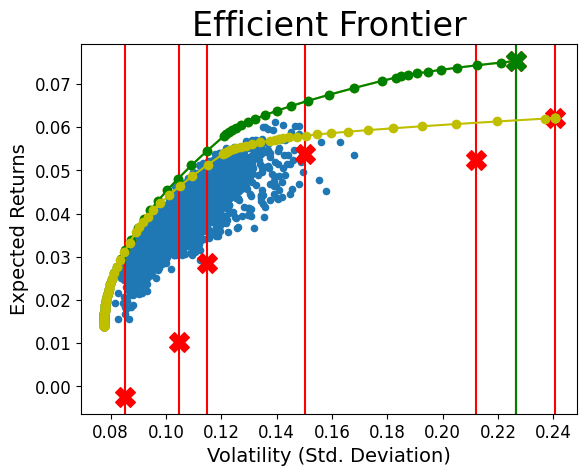

In [137]:
path='stock_data_nvidia.csv'

stock_data = pd.read_csv(path)
selected=list(stock_data.columns[1:])

returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()
cov_quarterly = returns_quarterly.cov()

single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
df = return_portfolios(expected_returns, cov_quarterly) 
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

df.plot.scatter(x='Volatility', y='Returns', fontsize=12)
plt.plot(risks, returns, 'y-o')
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
for xc in single_asset_std:
    plt.axvline(x=xc, color='red')

if 'nvidia' in path:
  plt.axvline(single_asset_std[-1], color='green')
  plt.scatter(single_asset_std[-1],expected_returns[-1],marker='X',color='green',s=200)
  original_EF=np.genfromtxt("stock_risks_returns.csv", delimiter=',')
  plt.plot(risks, returns, 'g-o')
  plt.plot(original_EF[:,0],original_EF[:,1], 'y-o')

plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()

## Diverse Portfolios Decrease Variance II

In the last exercise, you added Nvidia to your portfolio. Nvidia is a high-risk, high-return asset. Despite Nvidia’s risk, it improved the efficient frontier by increasing the expected return at most standard deviations. This is evident by the shift of the efficient frontier up and to the left.

In this example, a high-risk, high-return asset increased the expected return of portfolios on the efficient frontier. This is because the new asset had a larger expected return than any other asset.

Now let’s think about how we can decrease the risk of portfolios on the efficient frontier. What kind of asset do you think we should choose to decrease the risk of portfolios on the efficient frontier?

---

To decrease the risk of portfolios on an efficient frontier, you should add assets that are uncorrelated to assets in your portfolio.

Unlike with expected return, the risk of an individual asset does not indicate whether it will affect the risk of the overall portfolio. An uncorrelated asset increases the diversity of your portfolio, which protects you from a downturn that may affect a subset of your assets.


     pcost       dcost       gap    pres   dres
 0: -5.2736e-02 -1.0895e+00  1e+00  1e-16  3e+00
 1: -5.4123e-02 -9.9420e-02  5e-02  1e-16  1e-01
 2: -8.4292e-02 -9.8461e-02  1e-02  3e-17  3e-03
 3: -8.6311e-02 -8.6983e-02  7e-04  1e-16  1e-04
 4: -8.6851e-02 -8.6860e-02  8e-06  1e-16  1e-06
 5: -8.6858e-02 -8.6858e-02  8e-08  2e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2656e-02 -1.0894e+00  1e+00  2e-16  3e+00
 1: -5.4039e-02 -9.9305e-02  5e-02  1e-16  1e-01
 2: -8.3878e-02 -9.8035e-02  1e-02  3e-16  2e-03
 3: -8.5863e-02 -8.6559e-02  7e-04  8e-18  9e-05
 4: -8.6423e-02 -8.6432e-02  1e-05  2e-16  9e-07
 5: -8.6431e-02 -8.6431e-02  1e-07  1e-16  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2567e-02 -1.0893e+00  1e+00  0e+00  3e+00
 1: -5.3945e-02 -9.9177e-02  5e-02  1e-16  1e-01
 2: -8.3424e-02 -9.7557e-02  1e-02  3e-16  1e-03
 3: -8.5363e-02 -8.6084e-02  7e-04  1e-16  5e-05
 4: -8.5941e-02 -8.5953e

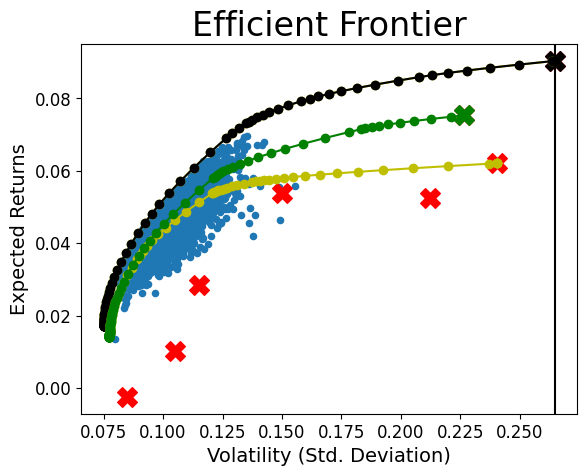

In [139]:
path='stocks_nvidia_dexcom.csv'

stock_data = pd.read_csv(path)
selected=list(stock_data.columns[1:])

returns_quarterly = stock_data[selected].pct_change()
expected_returns = returns_quarterly.mean()
cov_quarterly = returns_quarterly.cov()

single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
df = return_portfolios(expected_returns, cov_quarterly) 
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

df.plot.scatter(x='Volatility', y='Returns', fontsize=12)
plt.plot(risks, returns, 'y-o')
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)


if 'dexcom' in path:
  plt.axvline(single_asset_std[-1], color='black')
  plt.scatter(single_asset_std[-1],expected_returns[-1],marker='X',color='black',s=200)
  plt.scatter(single_asset_std[-2],expected_returns[-2],marker='X',color='green',s=200)
  original_EF=pd.read_csv('./risks_returns_original.csv')
  nvidia_EF=pd.read_csv('./risks_returns_nvidia.csv')
  plt.plot(risks, returns, 'k-o')
  plt.plot(original_EF['risks'],original_EF['returns'], 'y-o')
  plt.plot(nvidia_EF['risks'],nvidia_EF['returns'], 'g-o')

elif 'nvidia' in path:
  plt.axvline(single_asset_std[-1], color='green')
  plt.scatter(single_asset_std[-1],expected_returns[-1],marker='X',color='green',s=200)
  original_EF=pd.read_csv('./risks_returns_original.csv')
  plt.plot(risks, returns, 'g-o')
  plt.plot(original_EF['risks'],original_EF['returns'], 'y-o')
  
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()

#### Adding Dexcom does two things:

 - Increases the expected return at every standard deviation on the efficient frontier.
 - Decreases the risk at every expected return on the efficient frontier.

## Review
In this lesson, you learned how to find the efficient frontier – a set of portfolios that minimizes risk and maximizes expected return. You also learned:

 - How to calculate the weight of each asset in a portfolio, and use them to calculate the expected return of the portfolio
 - Why the covariance matrix is important for evaluating the risk of a portfolio, and how to calculate it using Pandas
 - How to use a function that returns portfolios from a wide range of mean-variance combinations for a given set of assets
 - How to plot the entire range of possible mean-variance combinations for a given set of assets
 - Where the efficient frontier falls on the mean-variance plot and why it falls there
 - That adding an uncorrelated asset will decrease the risk of portfolios on the efficient frontier


In `rf.py`, we included the `return_portfolios()` and `optimal_portfolio()` functions. The specifics of how these functions were implemented is outside the scope of this lesson. However, we recommend that you take some time to look through them now. While you don’t need to understand every line, it’s important for you to know how to use them.